In [1]:
%matplotlib inline
import numpy as np
from lsst.sims.photUtils import Sed, Bandpass
from gaia_spec import lsst_filters
import matplotlib.pylab as plt

In [12]:
kur = np.load('Kurucz_models.npz')
spec = kur['stellar_fluxes'].copy()
properties = kur['properties'].copy()
wave = kur['wave'].copy()
kur.close()
bps = lsst_filters()
kurucz_mags = np.zeros(spec.shape[0], dtype=zip(bps.keys(), [float]*len(bps.keys())))
sed = Sed()
for i, uspec in enumerate(spec):
    sed.setSED(wave, uspec)
    for key in bps.keys():
        kurucz_mags[key][i] = sed.calcMag(bps[key])
        
good = np.where(properties['logg'] == 4.)
properties = properties[good]
kurucz_mags = kurucz_mags[good]

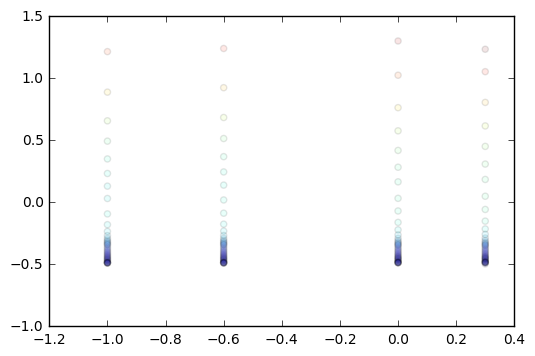

In [13]:
plt.scatter(properties['feH'], kurucz_mags['g']-kurucz_mags['r'], c=kurucz_mags['u']-kurucz_mags['g'], alpha=.1)


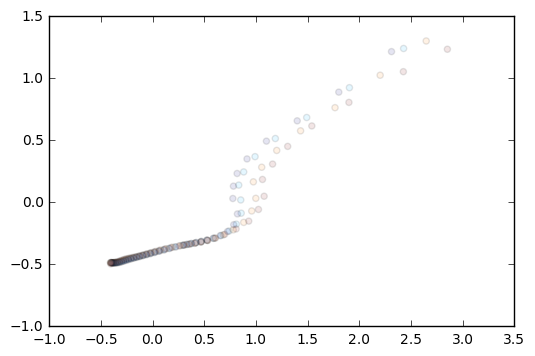

In [14]:
plt.scatter(kurucz_mags['u']-kurucz_mags['g'],kurucz_mags['g']-kurucz_mags['r'], c=properties['feH'], alpha=.1)